## 线性回归

In [160]:
#线性回归
def forward(wts, x):
    return np.dot(wts, x)

#采用平方差损失
def criterion(pred, lbl):
    return np.mean((pred-lbl)**2)/2

#采用梯度下降算法求解

def gradientDescent(inp, lbl, max_iter, lr=0.001):
    losses = []
    #input:x, y
    #init weights
    wts_num = inp.shape[0]
    wts = np.zeros(wts_num)
#     print(wts.shape)
    for i in range(max_iter):
        #compute cost
        wts = wts.reshape(1,wts_num)
        pred = forward(wts, inp)
#         print('pred:',pred)
        loss = criterion(pred, lbl)
#         print('loss:',loss)
        losses.append(loss)
        dw = [np.mean((pred-lbl)*inp[col,:]) for col in range(wts.shape[1])]
#         print(dw)
        wts = np.array([wts[0,idx]-lr*dw[idx] for idx in range(wts.shape[1])])
    print("finished! final loss is :", loss)
    return losses, wts

### 一元线性回归

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
#加载数据
data_path = 'ex1/ex1data1.txt'
data = np.loadtxt(data_path, delimiter=',')
m = data.shape[0]
inp = data[:,0].reshape(m,-1)
bias = np.ones((1, m))
inp = np.insert(inp, 0, values=bias, axis=1)
inp = inp.transpose()
lbl = data[:,1].reshape(1, m)
print("inp shape:", inp.shape)
print("lbl shape:", lbl.shape)

inp shape: (2, 97)
lbl shape: (1, 97)


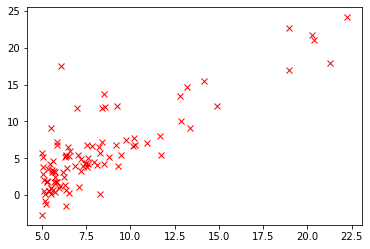

In [146]:
#可视化输入数据
plt.plot(inp[1,:], lbl[0,:], 'rx')
plt.show()

In [162]:
#学习率
lr = 0.01
#迭代次数
epoch = 1000
loss, wts = gradientDescent(inp, lbl, epoch, lr)

finished! final loss is : 4.516096429262984


可视化损失变化，检查梯度下降算法是否正常运行

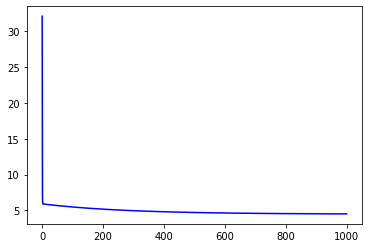

In [163]:
plt.plot(range(len(loss)), loss, 'b-')
plt.show()

看起来OK！！

可视化拟合效果

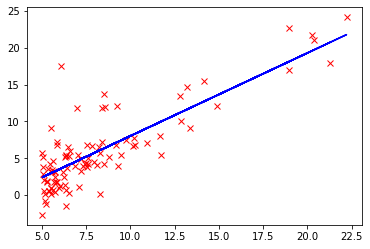

In [145]:
plt.plot(inp[1,:], lbl[0,:], 'rx')
plt.plot(inp[1,:], forward(wts, inp), 'b-')
plt.show()

### 多元线性回归

加载数据

In [147]:
data_path = 'ex1/ex1data2.txt'
data = np.loadtxt(data_path, delimiter=',')
m = data.shape[0]
ipt, lbl = data[:,:-1], data[:,-1]

特征归一化

In [90]:
def Norm(x):
    mean = np.mean(x,axis=0)
    std = np.std(x, axis=0)
    return mean, std, (x-mean)/std

In [151]:
mean, std, inp = Norm(ipt)
bias = np.ones(inp.shape[0])
inp = np.insert(inp, 0, values=bias, axis=1)#数据的第一个特征值设为1，对应偏置项
inp = inp.reshape(-1, m)
lbl = lbl.reshape(-1,m)

In [154]:
lr = 1
epoch=60000
wts, loss = gradientDescent(epoch, lr)

finished! final loss is : 38581479899.21505


In [157]:
ytest = np.array([1650.,3.])
xt = (ytest - mean)/std
xt = np.insert(xt,0,1)
multi_forward(weght, xt)

293081.4643348961

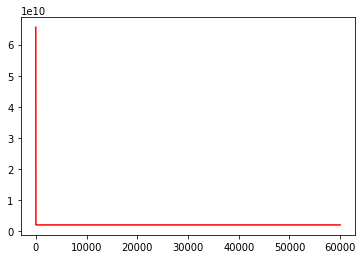

In [101]:
plt.plot(range(len(loss)), loss, 'r-')
plt.show()